In class Assignment Expectations/Steps -

Part 1: 

●	Load the data using Python Pandas library.

●	Do Exploratory Data Analysis of the data and state your insights.

Part 2: 

●	Check the linear regression assumptions are satisfied.

●	Perform All the various feature selection techniques.

●	Provide the inferences for various methods.

●	Perform All the various data transformation techniques. 

●	Provide the inferences for various methods.

●	Perform all the regularization techniques.

●	Provide the inference from the regularization techniques.


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import ProbPlot
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.datasets import load_boston

### Part 1

In [2]:
df=pd.read_csv('car-mpg.csv')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
df=df.drop(['car_name'],axis=1)

In [5]:
df['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
df['hp'] = df[df.hp != '?']

In [7]:
df['hp'].unique()

array([18.0, 15.0, 16.0, 17.0, 14.0, 24.0, 22.0, 21.0, 27.0, 26.0, 25.0,
       10.0, 11.0, 9.0, 28.0, nan, 19.0, 12.0, 13.0, 23.0, 30.0, 31.0,
       35.0, 20.0, 29.0, 32.0, 33.0, 17.5, 15.5, 14.5, 22.5, 24.5, 18.5,
       29.5, 26.5, 16.5, 31.5, 36.0, 25.5, 33.5, 20.5, 30.5, 21.5, 43.1,
       36.1, 32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6,
       18.1, 17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6,
       16.2, 19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4,
       34.2, 34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2,
       26.4, 24.3, 19.1, 34.3, 29.8, 31.3, 37.0, 32.2, 46.6, 27.9, 40.8,
       44.3, 43.4, 36.4, 44.6, 33.8, 32.7, 23.7, 32.4, 26.6, 25.8, 23.5,
       39.1, 39.0, 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9, 31.6,
       28.1, 30.7, 24.2, 22.4, 34.0, 38.0, 44.0], dtype=object)

In [8]:
df.hp=df['hp'].fillna(method='ffill')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg       398 non-null float64
cyl       398 non-null int64
disp      398 non-null float64
hp        398 non-null float64
wt        398 non-null int64
acc       398 non-null float64
yr        398 non-null int64
origin    398 non-null int64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


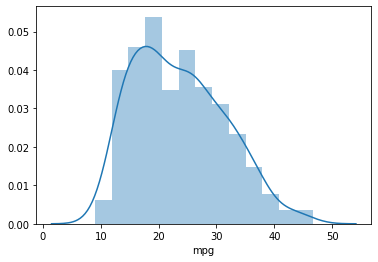

In [9]:
sns.distplot(df['mpg'])

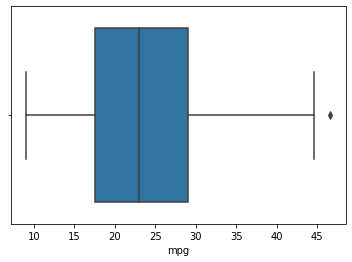

In [10]:
sns.boxplot(df['mpg'])

In [11]:
q1=df['mpg'].quantile(0.25)
q3=df['mpg'].quantile(0.75)
iqr=q3-q1
df=df[df['mpg']<(q3+1.5*iqr)]

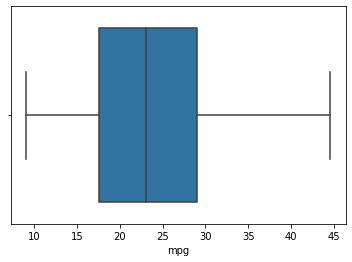

In [12]:
sns.boxplot(df['mpg'])

In [13]:
df.sort_index(axis=0,inplace=True)

In [14]:
df.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [15]:
df['mpg'].skew()

0.4272986284782642

### Part 2

In [16]:
y=df['mpg']
X=df.drop(['mpg'],axis=1)
Xc=sm.add_constant(X)
lin_reg=sm.OLS(y,Xc)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     9324.
Date:                Thu, 24 Oct 2019   Prob (F-statistic):               0.00
Time:                        18:00:29   Log-Likelihood:                -357.16
No. Observations:                 397   AIC:                             730.3
Df Residuals:                     389   BIC:                             762.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3761      0.767     -0.490      0.6

C:\Users\Hari\Anaconda_3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Assumption 1-Normality Residuals

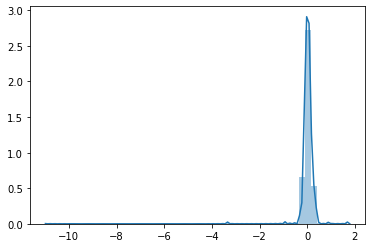

In [17]:
residuals=result.resid
sns.distplot(residuals)
plt.show()

In [18]:
residuals.mean()

8.362300496612414e-14

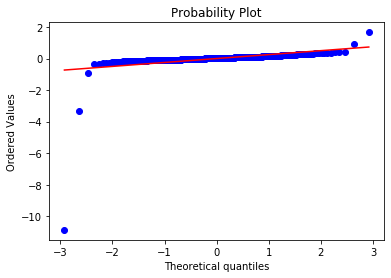

In [19]:
stats.probplot(residuals,plot=plt)
plt.show()

In [20]:
## Jarque-Berra Test
print(stats.jarque_bera(residuals))

(1311216.144026077, 0.0)


In [21]:
# transformation of y using log transform

lny=np.log(y)
lin_reg=sm.OLS(lny,Xc)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2562.
Date:                Thu, 24 Oct 2019   Prob (F-statistic):          6.23e-321
Time:                        18:00:30   Log-Likelihood:                 632.42
No. Observations:                 397   AIC:                            -1249.
Df Residuals:                     389   BIC:                            -1217.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1799      0.063     34.363      0.0

In [22]:
# Test for normality of residuals after transform y
residuals=result.resid
print(stats.jarque_bera(residuals))

(1921.4642866766771, 0.0)


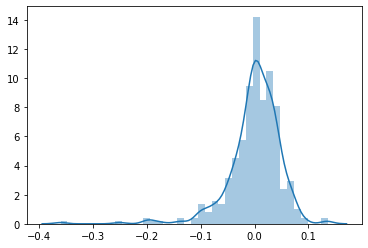

In [23]:
# see the distplot after transform y
sns.distplot(residuals)
plt.show()

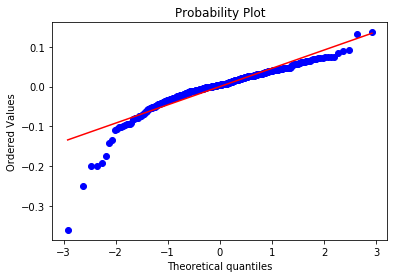

In [24]:
stats.probplot(residuals,plot=plt)
plt.show()

## Assumption-2 Multicollinearity

In [25]:
df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.778350,-0.806521,0.996922,-0.834482,0.418997,0.578468,0.558579
cyl,-0.778350,1.000000,0.950648,-0.778434,0.895817,-0.504515,-0.347247,-0.561466
disp,-0.806521,0.950648,1.000000,-0.805166,0.932646,-0.542701,-0.368392,-0.608028
hp,0.996922,-0.778434,-0.805166,1.000000,-0.831579,0.416234,0.580782,0.553401
wt,-0.834482,0.895817,0.932646,-0.831579,1.000000,-0.416206,-0.304641,-0.579533
acc,0.418997,-0.504515,-0.542701,0.416234,-0.416206,1.000000,0.286513,0.203070
yr,0.578468,-0.347247,-0.368392,0.580782,-0.304641,0.286513,1.000000,0.176781
origin,0.558579,-0.561466,-0.608028,0.553401,-0.579533,0.203070,0.176781,1.000000


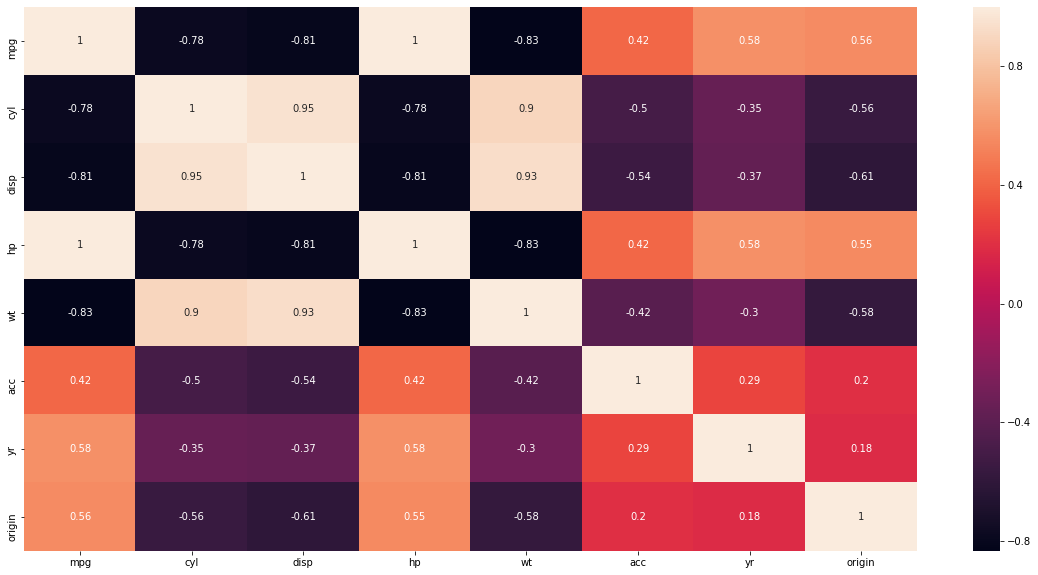

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [45]:
y=df['mpg']
X=df.drop(['mpg','yr','wt','cyl','acc'],axis=1)
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif},index=X.columns)

,vif
disp,2.057024
hp,8.140621
origin,6.927367


In [46]:
y=df['mpg']
X=df.drop(['mpg','yr','wt','cyl','acc'],axis=1)
Xc=sm.add_constant(X)
lin_reg=sm.OLS(y,X)
result=lin_reg.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.198e+05
Date:                Thu, 24 Oct 2019   Prob (F-statistic):                        0.00
Time:                        18:07:39   Log-Likelihood:                         -362.82
No. Observations:                 397   AIC:                                      731.6
Df Residuals:                     394   BIC:                                      743.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Assumption-3 Homoscedsticity(Constant variance of residuals)

In [48]:
y=df['mpg']
X=df.drop(['mpg'],axis=1)
Xc=sm.add_constant(X)
lin_reg=sm.OLS(y,Xc)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     9324.
Date:                Thu, 24 Oct 2019   Prob (F-statistic):               0.00
Time:                        18:09:12   Log-Likelihood:                -357.16
No. Observations:                 397   AIC:                             730.3
Df Residuals:                     389   BIC:                             762.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3761      0.767     -0.490      0.6

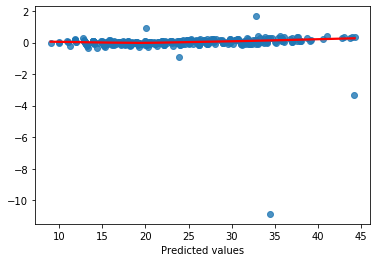

In [49]:
residuals=result.resid
y_pred=result.predict(Xc)
sns.regplot(x=y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
plt.xlabel('Predicted values')
plt.show()

In [50]:
name=['F statistic','p-value']
test=sms.het_goldfeldquandt(y=result.resid,x=Xc)
test

(136.50818793186073, 3.2698799788066155e-149, 'increasing')

## Assumption-4 Auto Correlation

C:\Users\Hari\Anaconda_3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


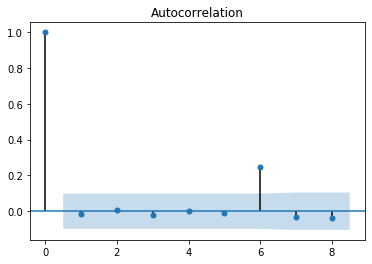

In [51]:
acf=smt.graphics.plot_acf(residuals,lags=8)
acf.show()

The ACF chart shows moderate correlation with errors of lag 1.This indicate mild autocorrelation also supported by DW-statistics of 1.01

## Assumption-5 Linearity of relationship

In [52]:
Xc=sm.add_constant(X)
lin_reg=sm.OLS(y,Xc)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     9324.
Date:                Thu, 24 Oct 2019   Prob (F-statistic):               0.00
Time:                        18:12:18   Log-Likelihood:                -357.16
No. Observations:                 397   AIC:                             730.3
Df Residuals:                     389   BIC:                             762.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3761      0.767     -0.490      0.6

In [53]:
y_pred=result.predict(Xc)

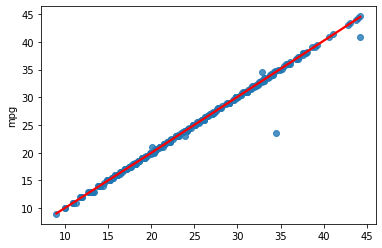

In [54]:
sns.regplot(x=y_pred,y=y,lowess=True,line_kws={'color':'red'})
plt.show()

## Feature selection techniques

In [55]:
# RFE-Recursive Feature Elimination

y=df['mpg']
X=df.drop(['mpg'],axis=1)
model=LinearRegression()
rfe=RFE(model,10)
X_rfe=rfe.fit_transform(X,y)
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
print(X.columns)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]
Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')


In [61]:
#Select  the best number to keep in RFE

noof_cols=8
score_list=[]

for n in range(noof_cols):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    model=LinearRegression()
    rfe=RFE(model,n+1)
    X_train_rfe=rfe.fit_transform(X_train,y_train)
    X_test_rfe=rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score=model.score(X_test_rfe,y_test)
    score_list.append(score)

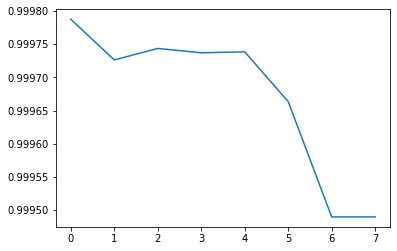

In [62]:
plt.plot(score_list)

In [63]:
score_list

[0.9997877456011404,
 0.9997264268601818,
 0.9997437235634687,
 0.9997371924279667,
 0.9997386113499043,
 0.9996636731129622,
 0.9994898578813449,
 0.9994898578813449]

In [64]:
cols=X.columns
model=LinearRegression()
rfe=RFE(model,8)
X_rfe=rfe.fit_transform(X,y)
model.fit(X_rfe,y)
temp=pd.Series(rfe.support_,index=cols)
selected_feature_rfe=temp[temp==True].index
print(selected_feature_rfe)

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')


In [70]:
# Step forward selection

y=df['mpg']
X=df.drop(['mpg'],axis=1)

lr=LinearRegression()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

sfs1=sfs(lr,k_features=7,forward=True,cv=3,verbose=2)
result=sfs1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2019-10-24 18:18:07] Features: 1/7 -- score: 0.9898575830681168[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2019-10-24 18:18:07] Features: 2/7 -- score: 0.9898610634933583[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2019-10-24 18:18:07] Features: 3/7 -- score: 0.9898524461587629[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [72]:
sel_cols=list(result.k_feature_names_)
cols

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

In [73]:
lr=LinearRegression()
lr.fit(X_train[sel_cols],y_train)
y_pred=lr.predict(X_test[sel_cols])

print('R2 on the test dataset: ',r2_score(y_test,y_pred))

R2 on the test dataset:  0.9993484367498269


In [74]:
# Sted backward selection

lr=LinearRegression()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

sfs1=sfs(lr,k_features=1,forward=False,cv=3,verbose=2)
result=sfs1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2019-10-24 18:20:14] Features: 6/1 -- score: 0.9896678838775007[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2019-10-24 18:20:14] Features: 5/1 -- score: 0.9897511056901469[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2019-10-24 18:20:14] Features: 4/1 -- score: 0.9898012127409043[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [75]:
lr=LinearRegression()
lr.fit(X_train[sel_cols],y_train)
y_pred=lr.predict(X_test[sel_cols])

print('R2 on the test dataset: ',r2_score(y_test,y_pred))

R2 on the test dataset:  0.9993484367498269


### Transformation techniques

In [77]:
# log transform
df2 = df.copy()
df_final1 = df2.transform(lambda X: np.log(X))
df_final1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,2.890372,2.079442,5.726848,2.890372,8.161660,2.484907,4.248495,0.0
1,2.708050,2.079442,5.857933,2.708050,8.214194,2.442347,4.248495,0.0
2,2.890372,2.079442,5.762051,2.890372,8.142063,2.397895,4.248495,0.0
3,2.772589,2.079442,5.717028,2.772589,8.141190,2.484907,4.248495,0.0
4,2.833213,2.079442,5.710427,2.833213,8.145840,2.351375,4.248495,0.0


There are no infinity values so the data is  so good.

In [79]:
# inverse transform
df_final1 = df2.transform(lambda X: 1/X)
df_final1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,0.055556,0.125,0.003257,0.055556,0.000285,0.083333,0.014286,1.0
1,0.066667,0.125,0.002857,0.066667,0.000271,0.086957,0.014286,1.0
2,0.055556,0.125,0.003145,0.055556,0.000291,0.090909,0.014286,1.0
3,0.062500,0.125,0.003289,0.062500,0.000291,0.083333,0.014286,1.0
4,0.058824,0.125,0.003311,0.058824,0.000290,0.095238,0.014286,1.0


There are no infinity values so the dats is so good. 

In [81]:
# exponential transform
df2 = df.copy()
df_final1 = df2.transform(lambda X: np.exp(X))
df_final1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,6.565997e+07,2980.957987,2.130129e+133,6.565997e+07,inf,162754.791419,2.515439e+30,2.718282
1,3.269017e+06,2980.957987,1.007091e+152,3.269017e+06,inf,98715.771011,2.515439e+30,2.718282
2,6.565997e+07,2980.957987,1.275397e+138,6.565997e+07,inf,59874.141715,2.515439e+30,2.718282
3,8.886111e+06,2980.957987,1.060529e+132,8.886111e+06,inf,162754.791419,2.515439e+30,2.718282
4,2.415495e+07,2980.957987,1.435270e+131,2.415495e+07,inf,36315.502674,2.515439e+30,2.718282


X = df_final1.drop('Price',axis=1)
y = df_final1.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

Model building will not work here as because there are few infinite values after transformation.

In [82]:
# Square root transform
df=df.copy()
df_sqrt=df.transform(lambda x:x**(0.5))
df_sqrt.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,4.242641,2.828427,17.521415,4.242641,59.194594,3.464102,8.3666,1.0
1,3.872983,2.828427,18.708287,3.872983,60.770058,3.391165,8.3666,1.0
2,4.242641,2.828427,17.832555,4.242641,58.617404,3.316625,8.3666,1.0
3,4.000000,2.828427,17.435596,4.000000,58.591808,3.464102,8.3666,1.0
4,4.123106,2.828427,17.378147,4.123106,58.728187,3.240370,8.3666,1.0


In [83]:
df.skew()

mpg       0.427299
cyl       0.522818
disp      0.716598
hp        0.435250
wt        0.527426
acc       0.284072
yr        0.016577
origin    0.932935
dtype: float64

The skewness values of all variables are small.so the data is good

## Regularization Techniques

In [85]:
# Lasso
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

lasso=Lasso(alpha=0.1)
lasso.fit(X,y)
pd.DataFrame(lasso.coef_,X.columns,columns=['coefs'])

,coefs
cyl,0.000000
disp,0.000369
hp,0.970127
wt,-0.000251
acc,0.000000
yr,0.004219
origin,0.000000


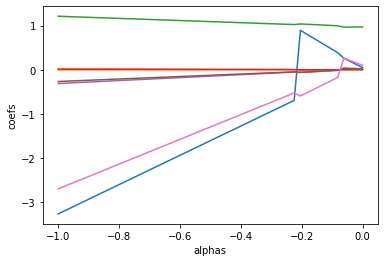

In [95]:
n_alphas=50
alphas=np.linspace(-1,0,n_alphas)
coefs=[]
model=Lasso()

for a in alphas:
    model.set_params(alpha=a)
    model.fit(X,y)
    coefs.append(model.coef_)

plt.plot(alphas,coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

The Chart shows that as alpha increases it is setting many coefficients is zero.However, we dont know optimal alpha.

In [105]:
# Let's tune the Lasso regresion and find the optimal alpha
n_alphas=1000
alphas=np.linspace(0,0.5,n_alphas)

lasso_cv=LassoCV(alphas=alphas,cv=3,random_state=22)
lasso_cv.fit(X,y)

LassoCV(alphas=array([0.        , 0.0005005 , 0.001001  , 0.0015015 , 0.002002  ,
       0.0025025 , 0.003003  , 0.0035035 , 0.004004  , 0.0045045 ,
       0.00500501, 0.00550551, 0.00600601, 0.00650651, 0.00700701,
       0.00750751, 0.00800801, 0.00850851, 0.00900901, 0.00950951,
       0.01001001, 0.01051051, 0.01101101, 0.01151151, 0.01201201,
       0.01251251, 0.01301301, 0.01351351, 0.01401401, 0.01451451,
       0.01501502, 0.015515...
       0.49049049, 0.49099099, 0.49149149, 0.49199199, 0.49249249,
       0.49299299, 0.49349349, 0.49399399, 0.49449449, 0.49499499,
       0.4954955 , 0.495996  , 0.4964965 , 0.496997  , 0.4974975 ,
       0.497998  , 0.4984985 , 0.498999  , 0.4994995 , 0.5       ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=22, selection='cyclic', tol=0.0001,
        verbose=False)

In [106]:
lasso_cv.alpha_

0.15665665665665665

In [107]:
lasso=Lasso(alpha=10.15665665665665665)
lasso.fit(X,y)
pd.DataFrame(lasso.coef_,X.columns,columns=['coefs'])

,coefs
cyl,-0.000000
disp,-0.002428
hp,0.433036
wt,-0.004025
acc,0.000000
yr,0.000000
origin,0.000000


In [108]:
# Ridge
ridge=Ridge(alpha=0.5)
ridge.fit(X,y)
pd.DataFrame(ridge.coef_,X.columns,columns=['coefs'])

,coefs
cyl,0.050449
disp,0.001005
hp,0.967832
wt,-0.000333
acc,0.021320
yr,0.014800
origin,0.103161


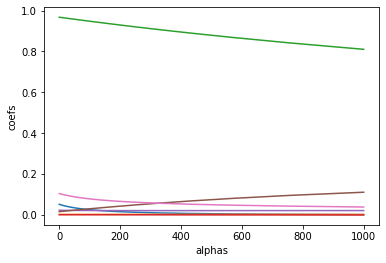

In [117]:
n_alphas=50
alphas=np.logspace(-3,3,n_alphas)
coefs=[]
model=Ridge()

for a in alphas:
    model.set_params(alpha=a)
    model.fit(X,y)
    coefs.append(model.coef_)

plt.plot(alphas,coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [120]:
n_alphas=1000
alphas=np.logspace(-1,0)

ridge_cv=RidgeCV(alphas=alphas,store_cv_values=True)
ridge_cv.fit(X,y)

ridge_cv.alpha_

1.0

In [121]:
ridge=Ridge(alpha=1)
ridge.fit(X,y)
pd.DataFrame(ridge.coef_,X.columns,columns=['coefs'])

,coefs
cyl,0.050204
disp,0.001008
hp,0.967733
wt,-0.000334
acc,0.021311
yr,0.014872
origin,0.102956


In [123]:
# Elastic net
from sklearn.linear_model import ElasticNet,ElasticNetCV

enet=ElasticNet(alpha=0.1)
enet.fit(X,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [124]:
pd.DataFrame(enet.coef_,X.columns,columns=['coefs'])

,coefs
cyl,0.000000
disp,0.000700
hp,0.966938
wt,-0.000297
acc,0.006112
yr,0.010695
origin,0.000000


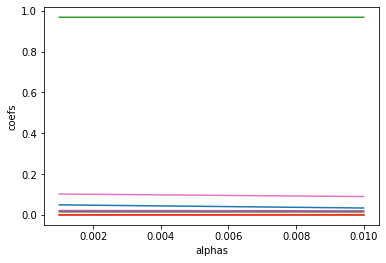

In [125]:
n_alphas=200
alphas=np.logspace(-3,-2,n_alphas)
coefs=[]
model=ElasticNet()

for a in alphas:
    model.set_params(alpha=a)
    model.fit(X,y)
    coefs.append(model.coef_)

plt.plot(alphas,coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [130]:
n_alphas=3000
alphas=np.logspace(-1,1,n_alphas)

en_cv=ElasticNetCV(alphas=alphas,cv=3)
en_cv.fit(X,y)
en_cv.alpha_

0.15585865003950258

In [131]:
enet=ElasticNet(alpha=0.15585865003950258)
enet.fit(X,y)
pd.DataFrame(enet.coef_,X.columns,columns=['coefs'])

,coefs
cyl,0.000000
disp,0.000452
hp,0.964051
wt,-0.000298
acc,0.000642
yr,0.010680
origin,0.000000
